In [ ]:
!pip install requests-html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
!pip install pandas

In [ ]:
!pip install prophet

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import json
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Монтируем Google Диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pivot_df = pd.read_csv('/content/drive/MyDrive/trial/pivot_df.csv', sep = ';', encoding='Windows-1251', parse_dates = [0], index_col = [0]) #

In [ ]:
solo_ipc = pivot_df[['1']].copy()

In [ ]:
solo_ipc = df

In [ ]:
solo_ipc.rename(columns={1.0: 'y'}, inplace=True)
solo_ipc.rename(columns={'Дата': 'ds'}, inplace=True)
print(solo_ipc.head())

0         ds       y
0 2002-01-01  103.09
1 2002-02-01  101.16
2 2002-03-01  101.08
3 2002-04-01  101.16
4 2002-05-01  101.69


In [ ]:
# Переименование столбца
solo_ipc.rename(columns={'1': 'y'}, inplace=True)

# Преобразование индекса в столбец с датой
solo_ipc.reset_index(inplace=True)
solo_ipc.rename(columns={'index': 'ds'}, inplace=True)

# Проверка результатов
print(solo_ipc.head())

          ds       y
0 2002-01-01  103.09
1 2002-02-01  101.16
2 2002-03-01  101.08
3 2002-04-01  101.16
4 2002-05-01  101.69


In [ ]:
# Переименование столбца
solo_ipc.rename(columns={'1': 'y'}, inplace=True)

# Преобразование индекса в столбец с датой
solo_ipc.reset_index(inplace=True)
solo_ipc.rename(columns={'index': 'ds'}, inplace=True)

# Проверка результатов
print(solo_ipc.head())

           ds       y
0  2002-01-01  103.09
1  2002-02-01  101.16
2  2002-03-01  101.08
3  2002-04-01  101.16
4  2002-05-01  101.69


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp08fvrexa/hja_lazf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp08fvrexa/zoiad_2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10317', 'data', 'file=/tmp/tmp08fvrexa/hja_lazf.json', 'init=/tmp/tmp08fvrexa/zoiad_2c.json', 'output', 'file=/tmp/tmp08fvrexa/prophet_model98goqwbb/prophet_model-20240414213602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:36:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:36:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


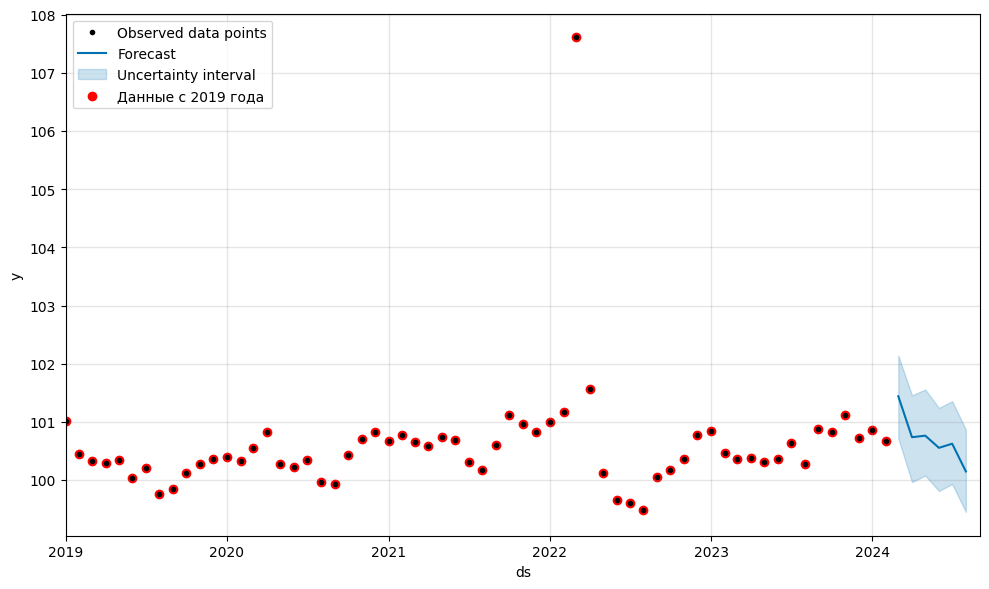

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Уточнение дат
start_date = '2002-01-01'
end_date = '2024-03-01'
forecast_start_date = '2024-04-01'
forecast_end_date = '2024-09-01'

# Создание экземпляра класса Prophet
model = Prophet()

# Обучение модели на данных из DataFrame solo_ipc
model.fit(solo_ipc)

# Создание DataFrame для прогноза
future = model.make_future_dataframe(periods=6, freq='M', include_history=False)

# Прогнозирование
forecast = model.predict(future)

# Визуализация прогноза
fig = model.plot(forecast)

# Фильтрация и визуализация данных с 2019 года
solo_ipc_2019 = solo_ipc[solo_ipc['ds'] >= '2019-01-01']
plt.scatter(solo_ipc_2019['ds'], solo_ipc_2019['y'], color='red', label='Данные с 2019 года')
plt.legend(loc='upper left')
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp(forecast_end_date))
plt.show()


In [ ]:
print(forecast)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-02-29,100.745996,100.717275,102.139065,100.745996,100.745996,0.694617,0.694617,0.694617,0.694617,0.694617,0.694617,0.0,0.0,0.0,101.440612
1,2024-03-31,100.753683,99.965587,101.456607,100.753683,100.753683,-0.017028,-0.017028,-0.017028,-0.017028,-0.017028,-0.017028,0.0,0.0,0.0,100.736655
2,2024-04-30,100.761122,100.077556,101.556401,100.759717,100.761847,0.002277,0.002277,0.002277,0.002277,0.002277,0.002277,0.0,0.0,0.0,100.763398
3,2024-05-31,100.768809,99.812622,101.240188,100.764776,100.771759,-0.214515,-0.214515,-0.214515,-0.214515,-0.214515,-0.214515,0.0,0.0,0.0,100.554294
4,2024-06-30,100.776248,99.931747,101.354851,100.769836,100.783068,-0.151544,-0.151544,-0.151544,-0.151544,-0.151544,-0.151544,0.0,0.0,0.0,100.624704
5,2024-07-31,100.783935,99.451480,100.867437,100.773280,100.795105,-0.635726,-0.635726,-0.635726,-0.635726,-0.635726,-0.635726,0.0,0.0,0.0,100.148209
